<a href="https://colab.research.google.com/github/Pankaj-2003/Assignment/blob/main/EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Assessment-2-Associate-DS(in).csv')


In [3]:
df

,weekend_date,channel,brand,category,sub_category,SerailNum,quantity
0,4/6/2022,Channel1,B1,Cat2,Sub-Cat2,1,56
1,11/6/2022,Channel1,B1,Cat2,Sub-Cat2,1,122
2,18/06/2022,Channel1,B1,Cat2,Sub-Cat2,1,102
3,25/06/2022,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2/7/2022,Channel1,B1,Cat2,Sub-Cat2,1,97
...,...,...,...,...,...,...,...
595,24/08/2024,Channel2,B2,Cat3,Sub-Cat3,2,250
596,24/08/2024,Channel2,B2,Cat3,Sub-Cat3,4,775
597,31/08/2024,Channel2,B1,Cat3,Sub-Cat4,4,1189
598,31/08/2024,Channel2,B2,Cat3,Sub-Cat3,2,180


In [5]:
df.shape

(600, 7)

In [9]:
# fixing the column name typo
df = df.rename(columns={'SerailNum': 'SerialNum'})


In [34]:
print(df.dtypes)

weekend_date    datetime64[ns]
channel                 object
brand                   object
category                object
sub_category            object
SerialNum                int64
quantity                 int64
dtype: object


In [15]:
# datatype fixing
df['weekend_date'] = df['weekend_date'].astype(str).str.split(' ').str[0]
df['weekend_date'] = pd.to_datetime(df['weekend_date'], dayfirst=True)

In [20]:
df

,weekend_date,channel,brand,category,sub_category,SerialNum,quantity
0,2022-06-04,Channel1,B1,Cat2,Sub-Cat2,1,56
1,2022-06-11,Channel1,B1,Cat2,Sub-Cat2,1,122
2,2022-06-18,Channel1,B1,Cat2,Sub-Cat2,1,102
3,2022-06-25,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2022-07-02,Channel1,B1,Cat2,Sub-Cat2,1,97
...,...,...,...,...,...,...,...
595,2024-08-24,Channel2,B2,Cat3,Sub-Cat3,2,250
596,2024-08-24,Channel2,B2,Cat3,Sub-Cat3,4,775
597,2024-08-31,Channel2,B1,Cat3,Sub-Cat4,4,1189
598,2024-08-31,Channel2,B2,Cat3,Sub-Cat3,2,180


In [23]:
# missing values
df.isnull().sum()


,0
weekend_date,0
channel,0
brand,0
category,0
sub_category,0
SerialNum,0
quantity,0


In [25]:
print(df.duplicated().sum())

0


In [27]:
df['quantity'].describe()
# right skewness can be seen as median<mean

,quantity
count,600.000000
mean,547.330000
std,925.749108
min,1.000000
25%,121.000000
50%,244.500000
75%,624.500000
max,8051.000000


<Axes: xlabel='quantity', ylabel='Count'>

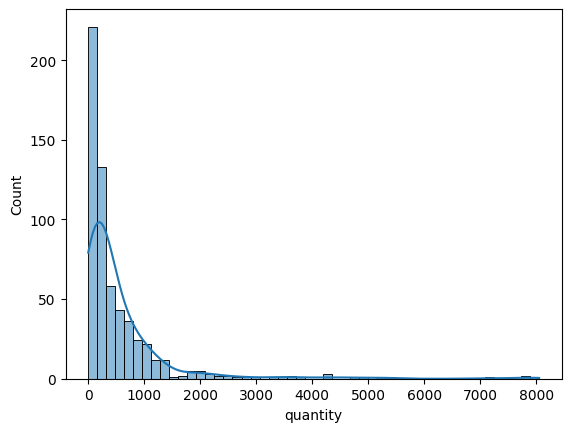

In [29]:
sns.histplot(df['quantity'], bins=50, kde=True)
#  classic right skewness can be seen

In [36]:
for col in [col for col in df.columns if df[col].dtype == "O"]:
    print(f"{col}: {df[col].nunique()} unique values")

channel: 3 unique values
brand: 2 unique values
category: 3 unique values
sub_category: 4 unique values


In [37]:
df

,weekend_date,channel,brand,category,sub_category,SerialNum,quantity
0,2022-06-04,Channel1,B1,Cat2,Sub-Cat2,1,56
1,2022-06-11,Channel1,B1,Cat2,Sub-Cat2,1,122
2,2022-06-18,Channel1,B1,Cat2,Sub-Cat2,1,102
3,2022-06-25,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2022-07-02,Channel1,B1,Cat2,Sub-Cat2,1,97
...,...,...,...,...,...,...,...
595,2024-08-24,Channel2,B2,Cat3,Sub-Cat3,2,250
596,2024-08-24,Channel2,B2,Cat3,Sub-Cat3,4,775
597,2024-08-31,Channel2,B1,Cat3,Sub-Cat4,4,1189
598,2024-08-31,Channel2,B2,Cat3,Sub-Cat3,2,180


In [40]:
# checking if data is sorted
is_sorted = df['weekend_date'].is_monotonic_increasing
print("Data is sorted? -->", is_sorted)


Data is sorted? --> False


In [41]:
# sorting
df = df.sort_values(['SerialNum', 'weekend_date'])


In [61]:
print(f"Date range: {df['weekend_date'].min()} to {df['weekend_date'].max()}")


Date range: 2022-05-28 00:00:00 to 2024-08-31 00:00:00


In [54]:
for serial_num in df['SerialNum'].unique():
    serial_data = df[df['SerialNum'] == serial_num].copy()

    # checking if weekly intervals are consistent
    date_diffs = serial_data['weekend_date'].diff().dt.days
    # 7 days as the data is weekly
    expected_interval = 7

    # finding gaps i.e more then 7 days difference
    gaps = date_diffs[date_diffs > expected_interval]
    if len(gaps) > 0:
        print(f"  SerialNum {serial_num}: {len(gaps)} gaps")
    else:
        print(f"  SerialNum {serial_num}: no gaps")

  SerialNum 1: no gaps
  SerialNum 2: no gaps
  SerialNum 3: 2 gaps
  SerialNum 4: no gaps
  SerialNum 5: 1 gaps


# **Visualization**


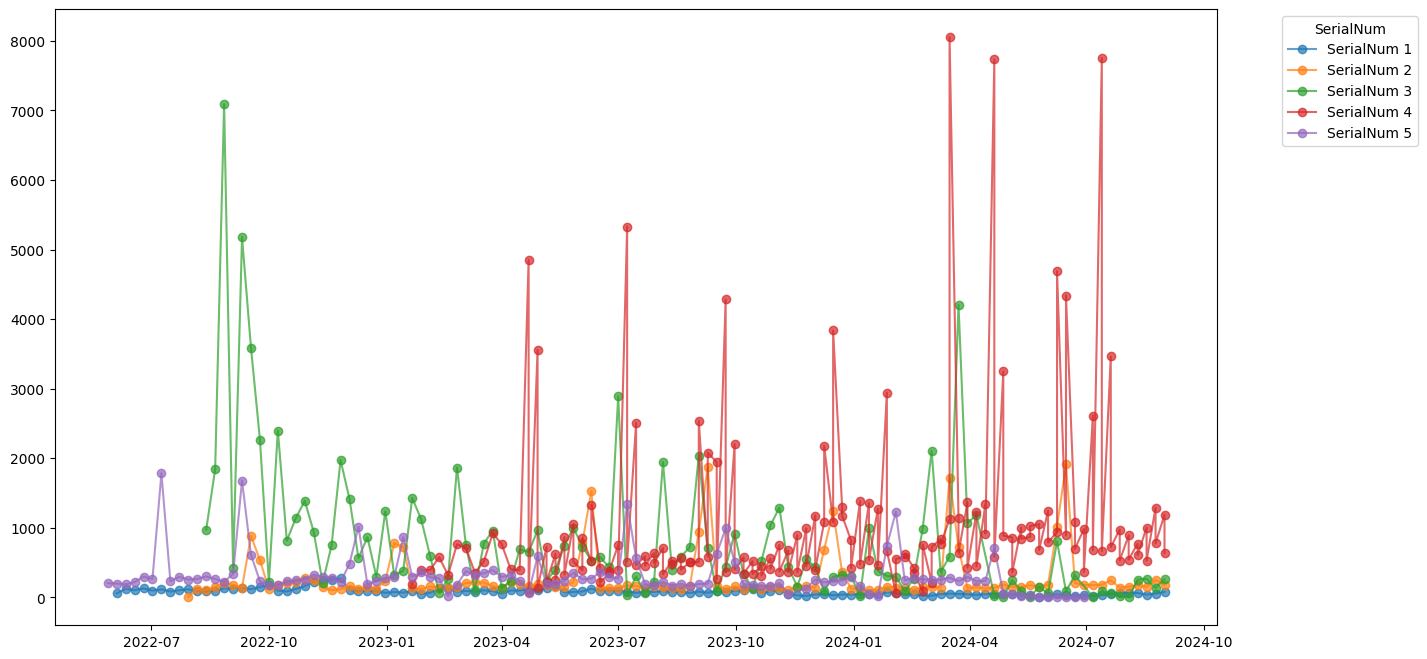

In [56]:
fig_width = 15
fig_height = 8

# overall time series plot
plt.figure(figsize=(fig_width, fig_height))
for serial_num in df['SerialNum'].unique():
    serial_data = df[df['SerialNum'] == serial_num]
    plt.plot(serial_data['weekend_date'], serial_data['quantity'],
             label=f'SerialNum {serial_num}', marker='o', alpha=0.7)

plt.legend(title="SerialNum", bbox_to_anchor=(1.05, 1), loc='upper left')



### outliers can be seen

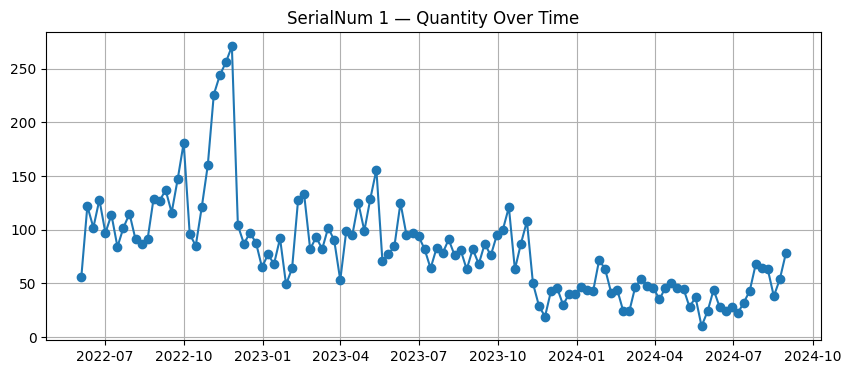

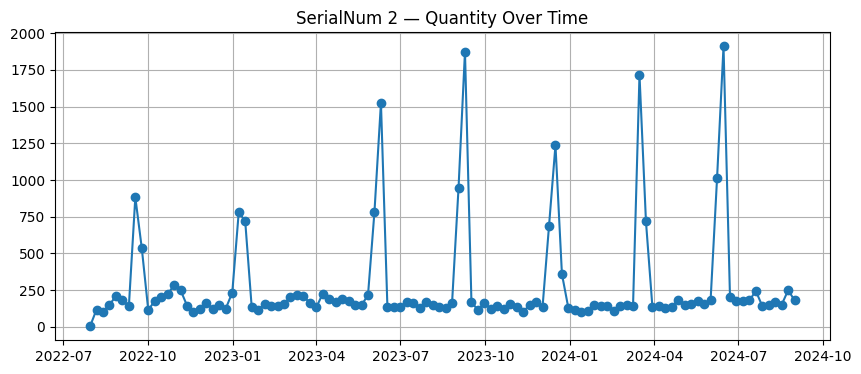

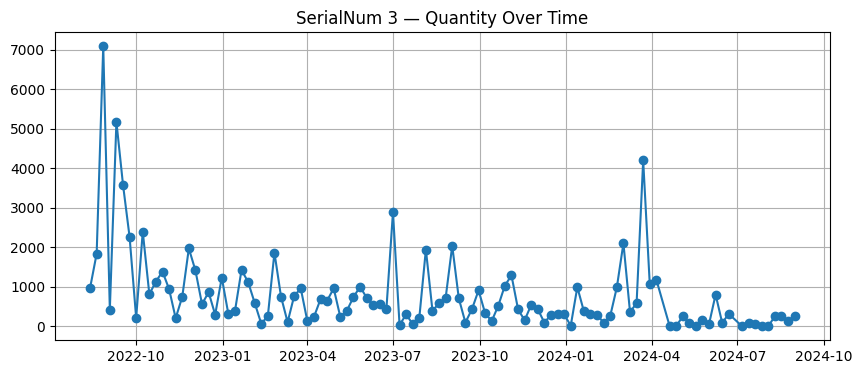

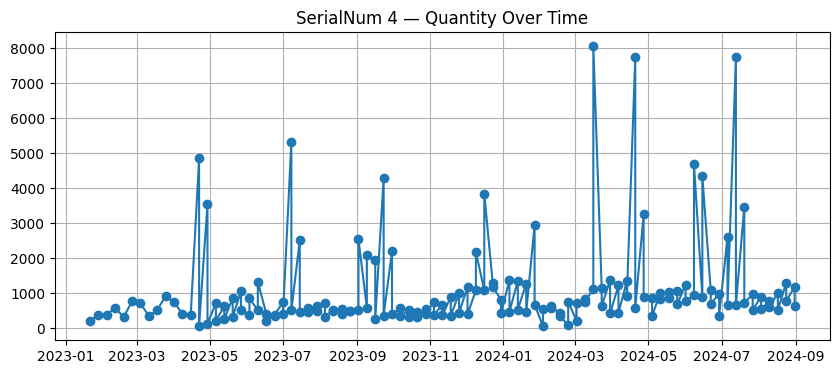

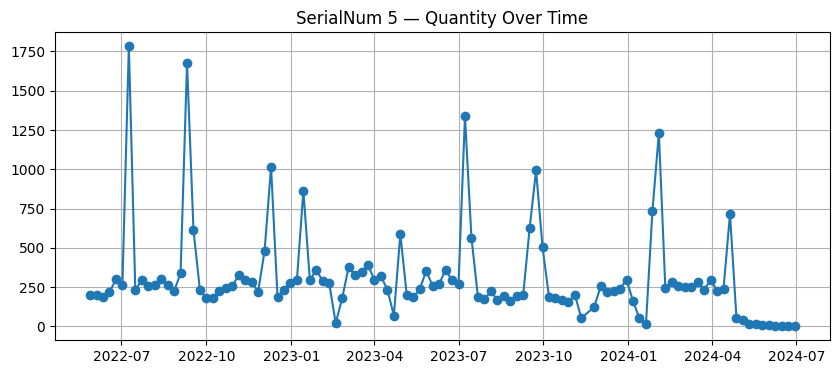

In [62]:
serial_nums = df['SerialNum'].unique()
for s in serial_nums:
    plt.figure(figsize=(10, 4))
    sub = df[df['SerialNum'] == s]
    plt.plot(sub['weekend_date'], sub['quantity'], marker='o')
    plt.title(f"SerialNum {s} — Quantity Over Time")
    plt.grid(True)


### Seasonality for some serial number can be seen here


Text(0, 0.5, 'Frequency')

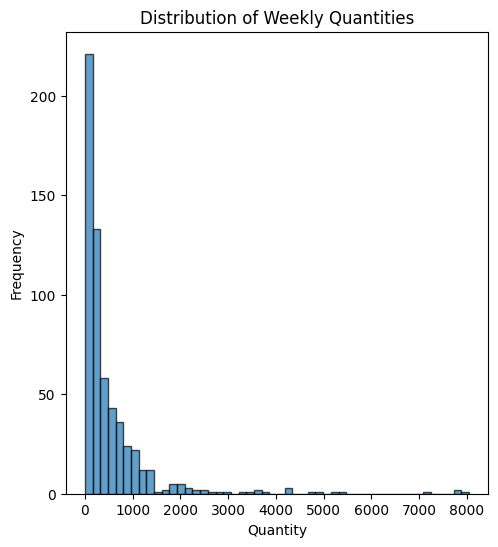

In [60]:
# Distribution of quantities
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['quantity'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Weekly Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

### right skew as seen before
### log transformation will be needed